---
# <h1><center><u>M5 Forecasting - Accuracy (Walmart Sales Forecasting) </u></center></h1>
<h5><center><u>Estimate the unit sales of Walmart retail goods</u></center></h5>

---

In the [M5 Forecasting - Accuracy](https://www.kaggle.com/c/m5-forecasting-accuracy/overview) on Kaggle, participants have the challenge using hierarchical sales data from Walmart, the world’s largest company by revenue, to forecast daily sales for the next 28 days. As these forecasting may lead to provide supply of right product at right store at right time, keeping balance in inventory levels and this can lead to increase in revenue. This notebook contains extensive **Exploratory Data Analysis** for the 5th Makridakis forecasting competitions (M5)!

### Some Background: 
The [Makridakis competitions ](https://en.wikipedia.org/wiki/Makridakis_Competitions)  (or M-competitions), organised by forecasting expert [Spyros Makridakis ]( https://en.wikipedia.org/wiki/Makridakis_Competitions) , aim to provide a better understanding and advancement of forecasting methodology by comparing the performance of different methods in solving a well-defined, real-world problem. The first M-competition was held in 1982. The [forth competition (M4)]( https://www.sciencedirect.com/science/article/pii/S0169207019301128) ran in 2018 and featured “100,000 time series and 61 forecasting methods” (source in link). According to forecasting researcher and practitioner Rob Hyndman the M-competitions “have had an enormous influence on the field of forecasting. They focused attention on what models produced good forecasts, rather than on the mathematical properties of those models”. This empirical approach is very similar to Kaggle’s trade-mark way of having the best machine learning algorithms engage in intense competition on diverse datasets. M5 is the first M-competition to be held on Kaggle.

**The goal:**
We have been challenged to predict sales data provided by the retail giant Walmart 28 days into the future. This competition will run in 2 tracks: In addition to forecasting the values themselves in the Forecasting competition, we are simultaneously tasked to estimate the uncertainty of our predictions in the Uncertainty Distribution competition. Both competitions will have the same 28 day forecast horizon.

### **Data:** 
We are working with 42,840 hierarchical time series. [The Data ](https://www.kaggle.com/c/m5-forecasting-accuracy/data) were obtained in the 3 US states of California (CA), Texas (TX), and Wisconsin (WI). “Hierarchical” here means that data can be aggregated on different levels: item level, department level, product category level, and state level. The sales information reaches back from Jan 2011 to June 2016. In addition to the sales numbers, we are also given corresponding data on prices, promotions, and holidays. Note, that we have been warned that most of the time series contain zero values.

The data comprises 3049 individual products from 3 categories and 7 departments, sold in 10 stores in 3 states. The hierachical aggregation captures the combinations of these factors. For instance, we can create 1 time series for all sales, 3 time series for all sales per state, and so on. The largest category is sales of all individual 3049 products per 10 stores for 30490 time series.

The training data comes in the shape of 3 separate files:

- `sales_train.csv`: this is our main training data. It has 1 column for each of the 1941 days from 2011-01-29 and 2016-05-22; not including the validation period of 28 days until 2016-06-19. It also includes the IDs for item, department, category, store, and state. The number of rows is 30490 for all combinations of 30490 items and 10 stores.

- `sell_prices.csv`: the store and item IDs together with the sales price of the item as a weekly average.

- `calendar.csv`: dates together with related features like day-of-the week, month, year, and an 3 binary flags for whether the stores in each state allowed purchases with SNAP food stamps at this date (1) or not (0).

#### Why Machine learning
* Machine learning methods outperforms statistical methods 
* Using feature engineering we can add other useful information like (prices,dates,events,lags,rolling) features on our data whereas the statistical methods only use historical sales data. 

#### Performance metric
The accuracy of the point forecasts will be evaluated using the Root Mean Squared Scaled Error (RMSSE), which is a variant of the well-known Mean Absolute Scaled Error (MASE).The measure is calculated for each series as follows:
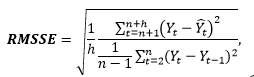
* The measure is scale independent, meaning that it can be effectively used to compare forecasts across series with different scales. 
* The measure penalizes positive and negative forecast errors, as well as large and small forecasts, equally, thus being symmetric.

**The Objective of this notebook is to get insights about data (EDA), preprocess it's features and get data ready for modelling.** 

### Importing the required Libraries

In [1]:
# Pandas is a library for data manipulation and analysis.
import pandas as pd 

# NumPy is a library for working with arrays and numerical operations.
import numpy as np  

# A plotting library that allows you to create static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# A high-level visualization library based on Matplotlib that provides a more visually appealing interface to create statistical graphics.
import seaborn as sns

# A high-level visualization library that allows you to create interactive plots with a simple syntax.
import plotly_express as px

# A library that provides a low-level interface for creating custom plots with Plotly.
import plotly.graph_objects as go

# A module that provides a simple way to create subplots with Plotly.
from plotly.subplots import make_subplots

# A library that provides a function to reduce the memory usage of Pandas dataframes by downcasting numerical columns.
from downcast import reduce

# A library that provides a calendar heatmap plot.
import calmap

# A module that provides functions to save Plotly figures to different file formats.
from plotly.io import to_image

# A module that provides functions to display rich media in IPython.
from IPython.display import Image     

# A module that allows you to control the display of warnings in Python.
import warnings

warnings.filterwarnings('ignore')   # set the warnings filter to ignore warnings
%matplotlib inline   # set the backend of matplotlib to show plots inline in Jupyter notebooks or IPython

In [ ]:
# sales = pd.read_pickle('sales_ad.pkl')
# cal = pd.read_pickle('cal_ad.pkl')
# prices = pd.read_pickle('prices_ad.pkl')

### Load Dataset

In [3]:
#There are 3 data training files as follows:
sales = pd.read_csv("sales_train_validation.csv")
prices = pd.read_csv("sell_prices.csv")
cal = pd.read_csv("calendar.csv")

print("Shape of sales:",sales.shape)
print("Shape of prices:",prices.shape)
print("Shape of cal:",cal.shape)

Shape of sales: (30490, 1919)
Shape of prices: (6841121, 4)
Shape of cal: (1969, 14)


In [3]:
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [4]:
prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [5]:
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

* sales: It includes all id's of item regarding category, depaetment, store, state and a sales column for each day from 2011-01-29 to 2016-04-24 (1913 days).
* prices: It has prices of items as a weekly average
* cal: It has date features, four event features showing whether there was event at that date or not and three snap features for whether that day had snap in some state or not.

In [6]:
#Basic info about data
print('No of unique items in a store:',len(sales['item_id'].unique()))
print('No of Deptartments:',len(sales['dept_id'].unique()))
print('No of Categories:',len(sales['cat_id'].unique()))
print('Total Stores:',len(sales['store_id'].unique()))
print('States:',len(sales['state_id'].unique()))

No of unique items in a store: 3049
No of Deptartments: 7
No of Categories: 3
Total Stores: 10
States: 3


* The states are  CA, TX and WI.
* The stores are CA_1, CA_2, CA_3, CA_4(CA), TX_1,TX_2, TX_3(TX) and W1_1, WI_2, WI_3(WI).
* The Categories are FOODS, HOUSEHOLD and HOBBIES.
* The Departments are FOODS_1, FOODS_2, FOODS_3(FOODS), HOUSEHOLD_1, HOUSEHOLD_2(HOUSEHOLD) AND HOBBIES_1, HOBBIES_2(HOBBIES).

###  Overview of Dataset

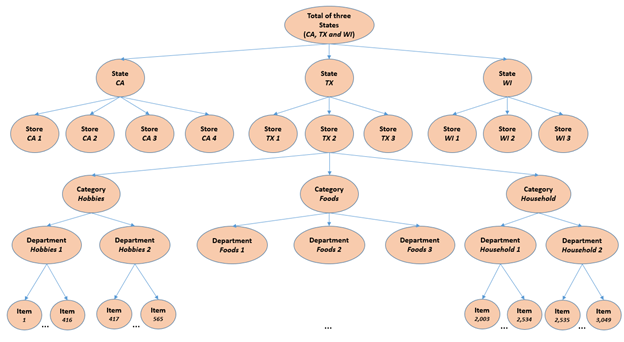

#### Downcasting
Downcasting reduces the size of dataframes. Basically what it does is for each (int/float) column it checks its min and max values and assign a data type with a lowest storage capacity for that column and for categorical features it changes it's data type from object to category. 

In [6]:
# Calculate the memory usage (in megabytes) of the sales, prices, and cal dataframes using the .memory_usage() method and round the results to one decimal place. 
# These values are stored in the variables sales_bd, prices_bd, and cal_bd, respectively.
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(cal.memory_usage().sum()/(1024*1024),1)

# Load the pickled dataframes from the files "sales_ad.pkl", "prices_ad.pkl", and "cal_ad.pkl" into the sales, prices, and cal variables, respectively.
sales = pd.read_pickle("sales_ad.pkl")
prices = pd.read_pickle("prices_ad.pkl")
cal = pd.read_pickle("cal_ad.pkl")

# Calculate the memory usage (in megabytes) of the sales, prices, and cal dataframes after they have been loaded using the .memory_usage() method and round the results to one decimal place. 
# These values are stored in the variables sales_ad, prices_ad, and cal_ad, respectively.
sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_ad = np.round(cal.memory_usage().sum()/(1024*1024),1)

These lines of code are used to measure the memory usage of the dataframes before and after loading them from pickled files. This can be useful for optimizing memory usage and identifying potential memory leaks in the code.

In [4]:
#Getting file size in MB before downcasting
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(cal.memory_usage().sum()/(1024*1024),1)

#Downcasting the dataframes
sales = reduce(sales)
prices = reduce(prices)
cal = reduce(cal)

#Getting size after Downcasting
sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_ad = np.round(cal.memory_usage().sum()/(1024*1024),1)


In [7]:
print("The size of sales (in MB) before/after downcasting: ",sales_bd,'/',sales_ad)
print("The size of prices (in MB) before/after downcasting: ",prices_bd,'/',prices_ad)
print("The size of cal (in MB) before/after downcasting: ",cal_bd,'/',cal_ad)

The size of sales (in MB) before/after downcasting:  446.4 / 94.1
The size of prices (in MB) before/after downcasting:  208.8 / 45.7
The size of cal (in MB) before/after downcasting:  0.2 / 0.1


In [18]:
# These lines of code are used to visualize the effect of downcasting on the memory usage of the dataframes, and save the resulting chart as a PNG image.
dic = {'DataFrame':['sales','prices','cal'],
       'Before downcasting':[sales_bd,prices_bd,cal_bd],
       'After downcasting':[sales_ad,prices_ad,cal_ad]}

memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
fig = px.bar(memory, x='DataFrame', y='Memory (MB)', color='Status', barmode='group', text='Memory (MB)')
fig.update_traces(texttemplate='%{text} MB', textposition='outside')
fig.update_layout(template='seaborn', title='Effect of Downcasting')
#fig.show()
img_bytes = fig.to_image(format="png")

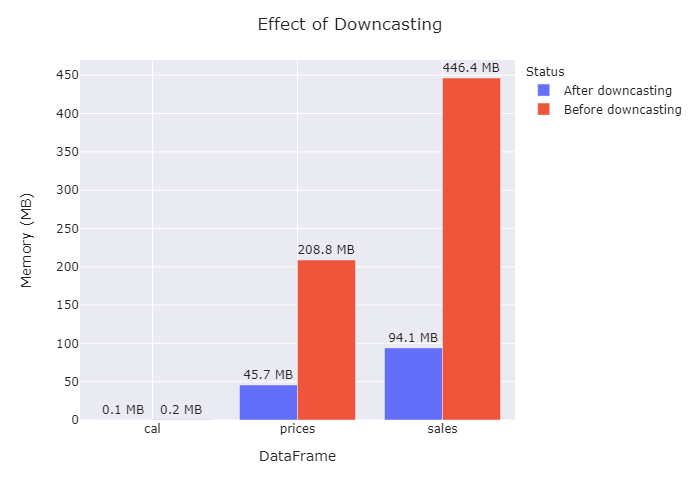

In [19]:
Image(img_bytes)

* Among all three dataframes sales got reduced the most maybe because of the 1913 int columns got reduced to it's lowest datatype

## Explanatory Data Analysis (EDA)


Exploratory Data Analysis (EDA) is an important step in any data analysis project, including the M5 Forecasting - Accuracy (Walmart Sales Forecasting) competition. The main goal of EDA is to gain insights into the structure of the data, detect patterns, anomalies, and relationships among variables, and identify potential issues with the data, such as missing values or outliers.

In the context of the M5 competition, EDA is important for several reasons:

- **Understanding the structure and content of the datasets:** The M5 competition provides multiple datasets that contain information on the historical sales, prices, and calendar events for Walmart products. EDA can help us understand the structure and content of these datasets, such as the number of rows and columns, the data types of the variables, and the distribution of the values.

- **Identifying trends and patterns in the sales data:** EDA can help us identify trends, patterns, and seasonalities in the sales data, such as the daily, weekly, and monthly sales patterns, and the effects of holidays and promotions on the sales.

- **Detecting outliers and missing values:** EDA can help us identify outliers and missing values in the data, and decide how to handle them, such as removing or imputing them.

- **Feature engineering:** EDA can help us generate new features from the existing data that may improve the accuracy of the sales forecasts, such as lagged sales, rolling averages, or holiday indicators.

- **Visualizing the results:** EDA can help us visualize the results of the data analysis and communicate the insights and findings to stakeholders, such as the competition organizers, team members, or investors.

Therefore, EDA is crucial for the M5 Forecasting - Accuracy (Walmart Sales Forecasting) competition as it helps us understand the data, generate new insights, and improve the accuracy of the sales forecasts. By analyzing the historical sales, prices, and calendar events data, we can estimate the unit sales of Walmart retail goods using various machine learning models, such as regression, time series forecasting, or deep learning models.


### EDA of Sales Data

#### All Aggregated Sales

Plotting the aggregate time series over all items, stores, categories, departments and sales.

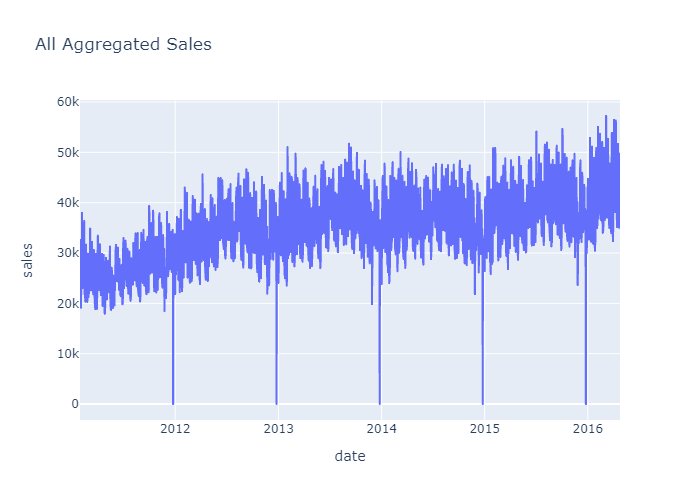

In [20]:
# Creates a line chart showing the total sales of all Walmart retail goods from January 29, 2011, to April 24, 2016.

# First selects the columns in the sales data that contain "d_" in their names, which represent daily sales, and sums up the sales for each day. 
d_cols = [i for i in sales.columns if 'd_' in i]

sales_df = sales[d_cols]

total_sales = list(sales_df.sum(axis = 0)) 

date_list = [d for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]
agg_sales = pd.DataFrame({'date' : date_list,'sales' : total_sales})

# It creates a dataframe with the dates and aggregated sales, and creates a line chart with Plotly Express. 
fig = px.line(agg_sales, x='date', y='sales', title = 'All Aggregated Sales')

# It adds hover information to show the date and sales amount when the user hovers over the chart. 
for ser in fig['data']:
    ser['text']= [d.strftime('%Y-%m-%d') for d in agg_sales['date']]
    ser['hovertemplate']='dates=%{text}<br>price=%{y}'

#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* After some decline in sales in 2011 an upward trend is observed
* Zero sales is observed in each year that is christmas (2011-12-25).
* After Zooming, a weekly seasonality is also observed.
* Comparing to all years, little faster growth is observed in 2016.

#### Monthly Aggregated sales per state

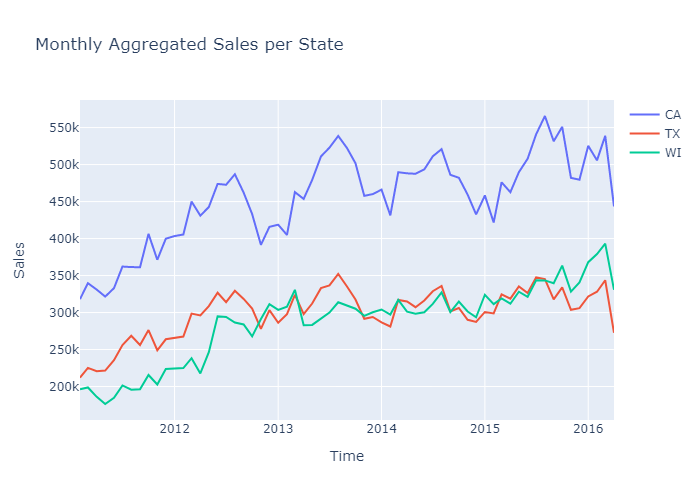

In [21]:
# calculates the monthly aggregated sales per state and visualizes it using a line plot with Plotly.

# First, the code groups the sales data by state and calculates the total sales for each month. 
sales_df = sales.groupby(['state_id'])[d_cols].sum()

date_list = [(d.year*100)+d.month for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

agg_sales = pd.DataFrame({'date' : date_list, 'CA_sales' : sales_df.iloc[0], 'TX_sales' : sales_df.iloc[1], 'WI_sales' : sales_df.iloc[2]})
monthly_agg = agg_sales.groupby('date').sum()
monthly_agg = monthly_agg.iloc[1:]

monthly_dates = [d for d in pd.date_range(start = '2011-01-29', end = '2016-04-24', freq = 'MS')]

# Then, it creates a dataframe with the monthly sales for each state and creates a line plot with three traces, one for each state. 
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_dates, y= monthly_agg['CA_sales'],
                    mode='lines',
                    name='CA'))
fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['TX_sales'],
                    mode='lines',
                    name='TX'))
fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['WI_sales'],
                    mode='lines', name='WI'))

# The resulting plot shows the sales trend over time for each state.
fig.update_layout(title='Monthly Aggregated Sales per State',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* Comparing to other states California(CA) sales performed better, while sales of Texas(TX) and Wisconsin(WI) found to be intersecting with each other, ending up with a raise in Wisconsin(WI).
* Mostly the raise in sales in a year was observed in pre-Autumn months (Aug-Oct)
* In 2014-15 a dip was observed in sales, which was severe in CA and slightly less in other two.

#### Overall Sales per store

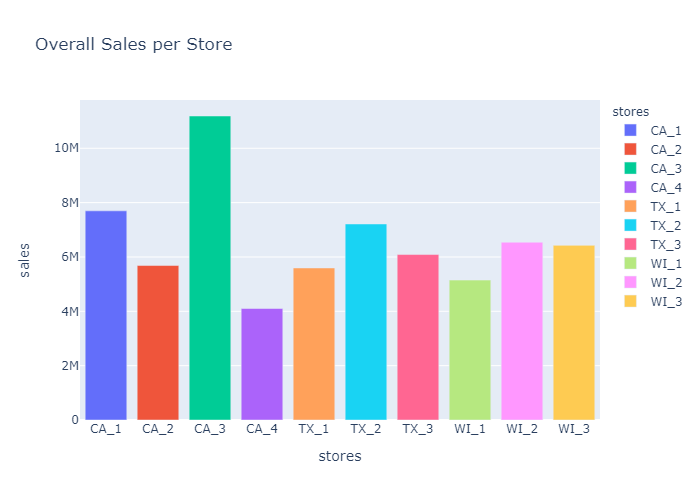

In [22]:
# This code reads the sales dataframe and aggregates the daily sales data by store_id. 
# It then sums up the total sales across all days for each store and creates a bar plot showing the overall sales for each store. 
# The resulting plot is displayed using Plotly Express.

d_cols = [i for i in sales.columns if 'd_' in i]
sales_df = sales.groupby(['store_id'])[d_cols].sum()
store_sales = sales_df.sum(axis = 1)
bar_plot = pd.DataFrame({'stores':store_sales.index, 'sales':store_sales.values})
fig = px.bar(bar_plot, x='stores', y='sales', color = 'stores', title = 'Overall Sales per Store')

#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* The CA_3 store have the highest sales whereas CA_4 have the lowest
* Stores in Texas(TX) and Winsconsin(WI) have similar sales among their corresponding state stores.

#### Sales of Stores in CA State

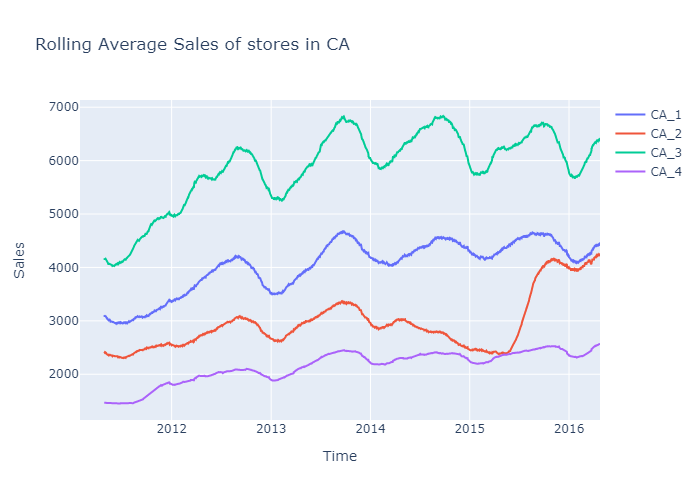

In [23]:
# Creates a line chart showing the rolling average sales of stores in California (CA) over time.

# First generates a list of dates from January 29, 2011 to April 24, 2016 using pd.date_range(). 
# It then creates a pivot table past_sales from the sales dataframe, where the index is set to the id column and the columns are the sales data columns (d_1 to d_1913).
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

past_sales = sales.set_index('id')[d_cols].T

# Next, Selects only the columns for stores in California (CA_1, CA_2, CA_3, CA_4) and calculates the rolling 90-day mean for each store's total sales. 
cols = ['CA_1','CA_2','CA_3','CA_4']

# It then adds a trace for each store to a go.Figure() object and sets the y-axis title, x-axis title, and chart title. 
fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
# Finally, it generates a PNG image of the chart using fig.to_image() and the Image() function from the PIL library.
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in CA")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* In California(CA) the store CA_1 has the highest sales and Ca_4 has the lowest
* There is almost similar trend observed in all stores of california, except CA_2 store. From mid of 2014 the sales of CA_2 has started decline and met with CA_4  in mid 2015 and then had sudden increase and followed CA_1 trend.

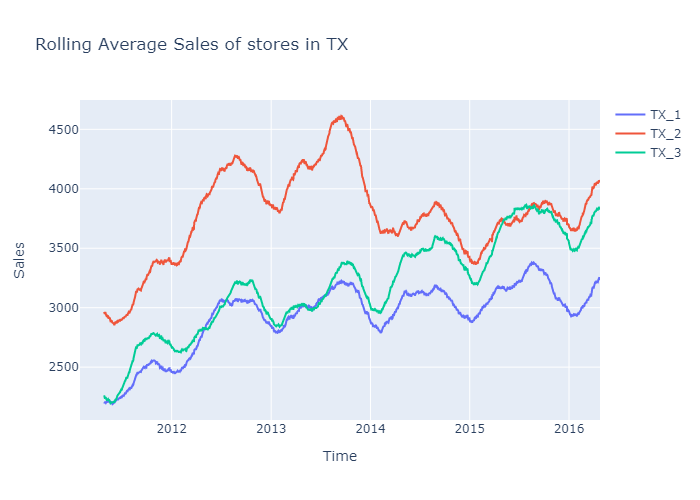

In [24]:
#Sales of stores in TX

# Generates a rolling average sales plot for the stores in TX. 
# The sales data for the stores are extracted from the 'sales' dataframe and the rolling average is calculated over a period of 90 days. 

cols = ['TX_1','TX_2','TX_3']

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))

# The resulting plot shows the trends in the sales data for each store in TX over time.
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in TX")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* In Texas the TX_2 have highest sales and TX_1 have lowest
* The sales of TX_1 and TX_2 follows similar trend while the sales of TX_3 often intersects with TX_1 for the starting years (2011-13) and with TX_2 for ending years(2015-16). 

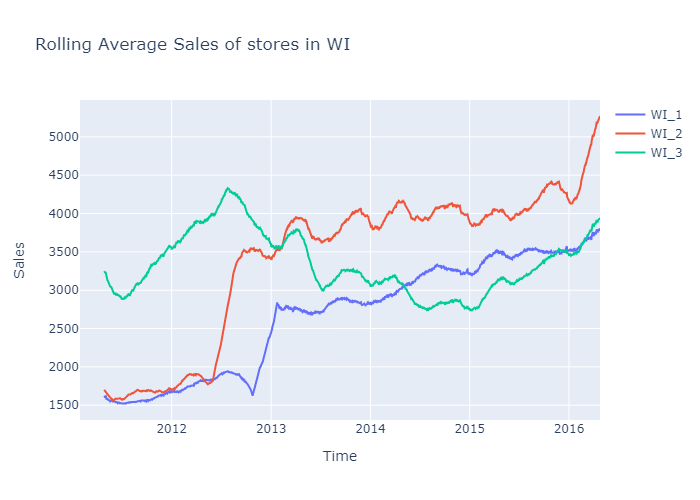

In [25]:
#Sales of stores in WI
cols = ['WI_1','WI_2','WI_3']

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in WI")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* No similar trend observed among the sales of stores of Wisconsin(WI).
* Store WI_3 had the highest sales for the starting years (2011-13) but decline in mid years(2013-14), started increasing in 2015.
* Store WI_1 and WI_2 have almost similar sales at beginning. The sales of WI_2 suddenly increased in mid of 2012 and followed an increasing trend, whereas WI_1 suddenly increased (not up to sales of WI_2) in end of 2012 and also followed an increasing trend further. 


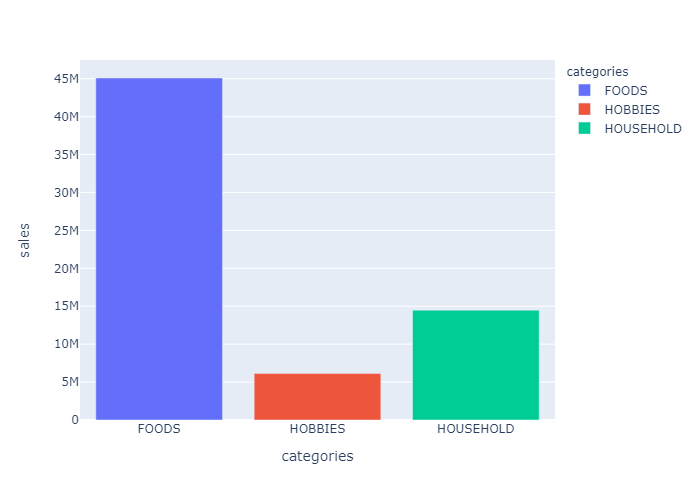

In [26]:
#Overall Sales Category wise

sales_df = sales.groupby(['cat_id'])[d_cols].sum()
cat_sales = sales_df.sum(axis = 1)
bar_plot = pd.DataFrame({'categories':cat_sales.index, 'sales':cat_sales.values})
fig = px.bar(bar_plot, x='categories', y='sales', color = 'categories')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

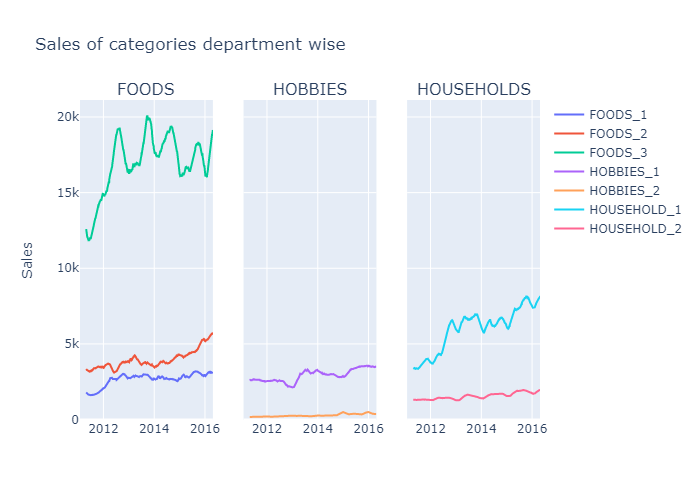

In [27]:
#Sales per categories

fig = make_subplots(rows = 1,cols = 3,subplot_titles=('FOODS', 'HOBBIES', 'HOUSEHOLDS'),shared_yaxes = True)

depts = [['FOODS_1','FOODS_2','FOODS_3'],['HOBBIES_1','HOBBIES_2'],['HOUSEHOLD_1','HOUSEHOLD_2']]

dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

past_sales = sales.set_index('id')[d_cols].T

for i in range(len(depts)):
    cols = depts[i]
    for s in cols:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Scatter(x=dates, y=data, name=s),row = 1,col = i+1)
    
fig.update_layout(yaxis_title="Sales", title = 'Sales of categories department wise')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* FOODS is the most sold categoy followed by HOUSEHOLD and HOBBIES. It is obvious that people will need essential items the most than other things.
* FOODS_3 is driving the sales of FOOD Category,while FOODS_2 is little picking up at the end.
* HOUSEHOLD_1 tends to follow an increasing trend while the other three (HOOBIES_1,HOBBIES_2, HOUSEHOLD_2) seems to be settled at the same range of sales.

### EDA on Calendar data 

In [19]:
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0 2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1 2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2 2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3 2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4 2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [3]:
cal = cal.fillna('No_Event')

In [4]:
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1     No_Event   
1  2011-01-30     11101     Sunday     2      1  2011  d_2     No_Event   
2  2011-01-31     11101     Monday     3      1  2011  d_3     No_Event   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4     No_Event   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5     No_Event   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0     No_Event     No_Event     No_Event        0        0        0  
1     No_Event     No_Event     No_Event        0        0        0  
2     No_Event     No_Event     No_Event        0        0        0  
3     No_Event     No_Event     No_Event        1        1        0  
4     No_Event     No_Event     No_Event        1        0        1

In [5]:
print('Total Events in a year:',len(cal['event_name_1'].unique())-1)
print('Different types of Events:',len(cal['event_type_1'].unique())-1,"they are",cal['event_type_1'].unique()[1:])

Total Events in a year: 30
Different types of Events: 4 they are ['Sporting' 'Cultural' 'National' 'Religious']


In [6]:
d_events = len(cal)-len(cal[cal['event_type_1'] == 'No_Event'])
print("Days with events:",d_events)
print(round((d_events/len(cal))*100,2),"% of days had events")

Days with events: 162
8.23 % of days had events


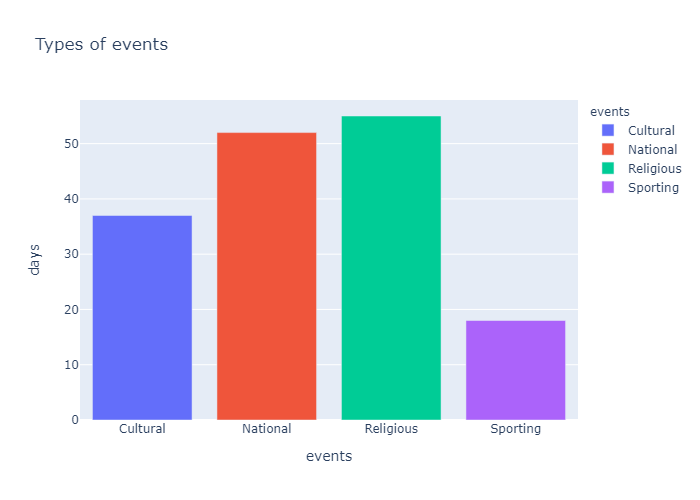

In [29]:
bar_plot = cal.groupby(['event_type_1']).agg(['count'])
bar_df = pd.DataFrame({'events':bar_plot.index,'days' : bar_plot[('date','count')]})
#bar_df = bar_df.drop(['No_Event'])
fig = px.bar(bar_df, x='events', y='days', color = 'events',title = 'Types of events')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

#### Plotting the snap days for each state for year 2012

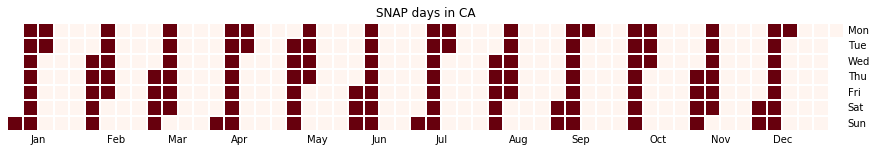

In [24]:
days = pd.date_range('1/29/2011', periods=1969, freq='D')

event1 = pd.Series(cal['snap_CA'].values,index = days)
event2 = pd.Series(cal['snap_TX'].values,index = days)
event3 = pd.Series(cal['snap_WI'].values,index = days)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event1, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days in CA")
plt.show()

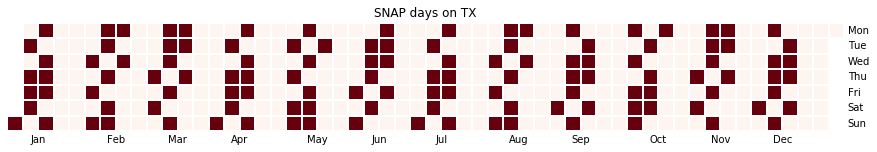

In [25]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event2, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days on TX")
plt.show()

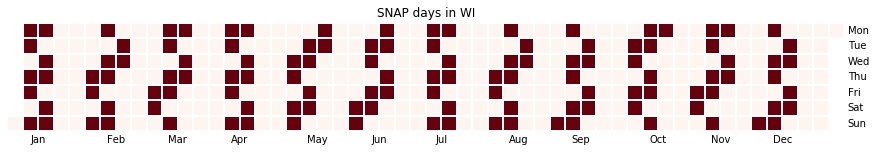

In [26]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event3, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days in WI")
plt.show()

### Observations:
* Out of total days covered in data, 8% of the days have a special event. Of these events Religious and National events are the most events.
* Almost 30% of the days had the sales of items with SNAP food stamps. In CA state the first 10 days of months are SNAP days. In TX state the SNAP days follows the code 101011 and in WI SNAP days follows 011 code.All the SNAP days are in the first 15 days of the months.Thus making it the 30% of the data. 

In [41]:
cal = pd.read_csv('calendar.csv')
cal = cal.fillna('No_Event')

### Sales on  Events vs Non_events

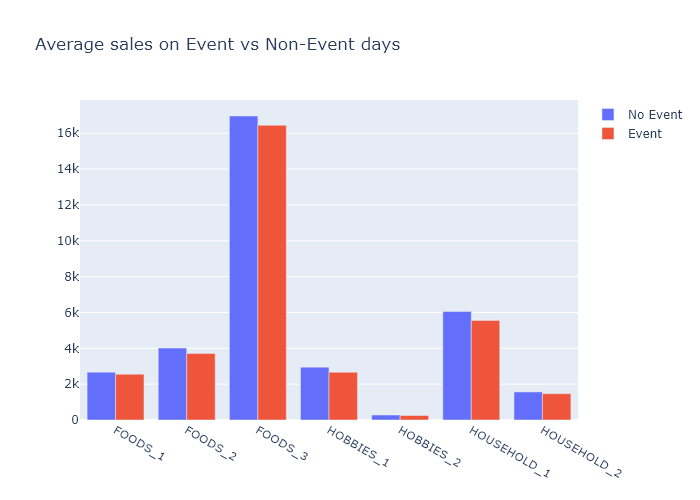

In [43]:
cal = cal.iloc[:1913]
d_no_event = list(cal[cal['event_type_1'] == 'No_Event']['d'])
d_event = list(cal[cal['event_type_1'] != 'No_Event']['d'])

sales_df = sales.groupby(['dept_id']).sum()

no_mean = []
eve_mean = []

depts = ['FOODS_1','FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_event].iloc[i].mean())
    eve_mean.append(sales_df[d_event].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Event', x=depts, y = no_mean),
    go.Bar(name='Event', x=depts, y = eve_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Event vs Non-Event days')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observation:
* Average sale on Non-Event day is slightly greater to average sale on event day for all categories

### Sales on Snap vs Non_snap days

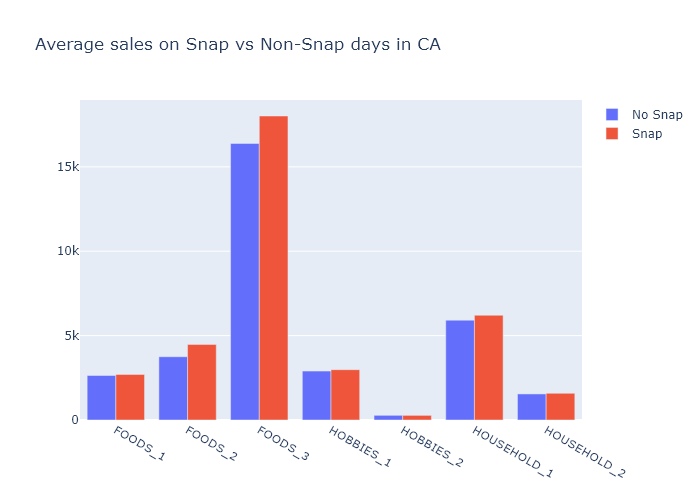

In [52]:
#For CA

d_no_snap = list(cal[cal['snap_CA'] == 0]['d'])
d_snap = list(cal[cal['snap_CA'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in CA')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

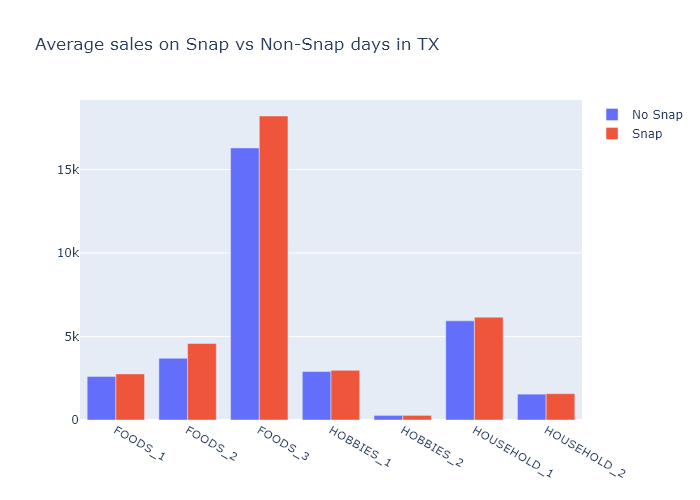

In [53]:
#For TX

d_no_snap = list(cal[cal['snap_TX'] == 0]['d'])
d_snap = list(cal[cal['snap_TX'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in TX')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

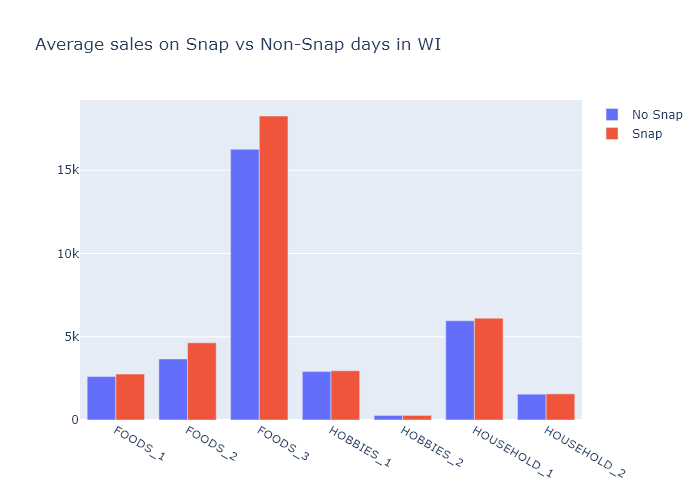

In [54]:
#For WI

d_no_snap = list(cal[cal['snap_WI'] == 0]['d'])
d_snap = list(cal[cal['snap_WI'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in WI')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* In all states the plot is same
* On snap days as the item prices are low the average sales are slighlty high than normal sales
* Among all the category FOODS_3 category have large difference between sales on snap and normal days.

### Weekly seasonality
Calulating overall sales of each state and aggregating the sales on each day of the week.

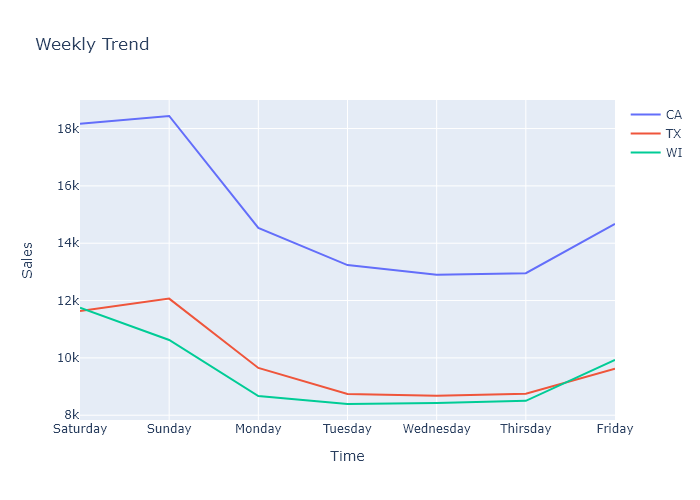

In [5]:
days = list(cal['wday'].iloc[:1913])
sales_df = sales.groupby(['state_id']).sum()

weekly_agg = pd.DataFrame({'weeks': days, 'CA' : sales_df.iloc[0], 'TX' : sales_df.iloc[1], 'WI' : sales_df.iloc[2]})
weekly_agg = weekly_agg.groupby(['weeks']).mean()
#weekly_agg.head()

fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y= weekly_agg['CA'],
                    mode='lines',
                    name='CA'))
fig.add_trace(go.Scatter(x=days, y=weekly_agg['TX'],
                    mode='lines',
                    name='TX'))
fig.add_trace(go.Scatter(x=days, y=weekly_agg['WI'],
                    mode='lines', name='WI'))

fig.update_layout(title='Weekly Trend',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* Similar trend in three state with highest sales on weekends.

### Monthly Seasonality
Calulating overall sales of each state and aggregating the sales on each month of the year.

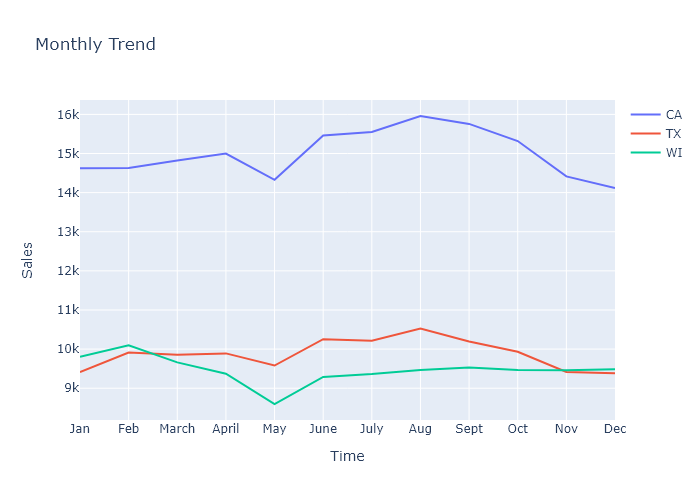

In [6]:
month_no = list(cal['month'].iloc[:1913])

monthly_agg = pd.DataFrame({'months': month_no, 'CA' : sales_df.iloc[0], 'TX' : sales_df.iloc[1], 'WI' : sales_df.iloc[2]})
monthly_agg = monthly_agg.groupby(['months']).mean()

months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']

fig = go.Figure()
fig.add_trace(go.Scatter(x=months, y= monthly_agg['CA'],
                    mode='lines',
                    name='CA'))
fig.add_trace(go.Scatter(x=months, y=monthly_agg['TX'],
                    mode='lines',
                    name='TX'))
fig.add_trace(go.Scatter(x=months, y=monthly_agg['WI'],
                    mode='lines', name='WI'))

fig.update_layout(title='Monthly Trend',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* Highest sales in observed in March with slightly dips in month Nov and May.

### Weekly Seasonality by category and state

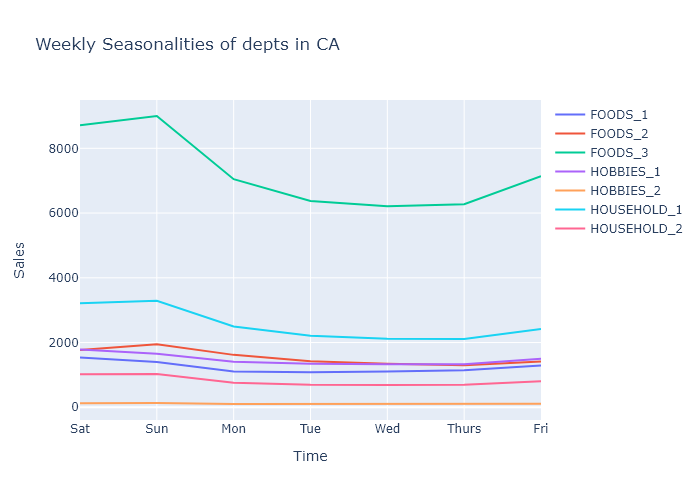

In [19]:
#For CA
days = list(cal['wday'].iloc[:1913])
sales_df = sales[sales['state_id'] == 'CA'].groupby(['dept_id']).sum()

w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
w_seas = w_seas.groupby(['days']).mean()
w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Weekly Seasonalities of depts in CA',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

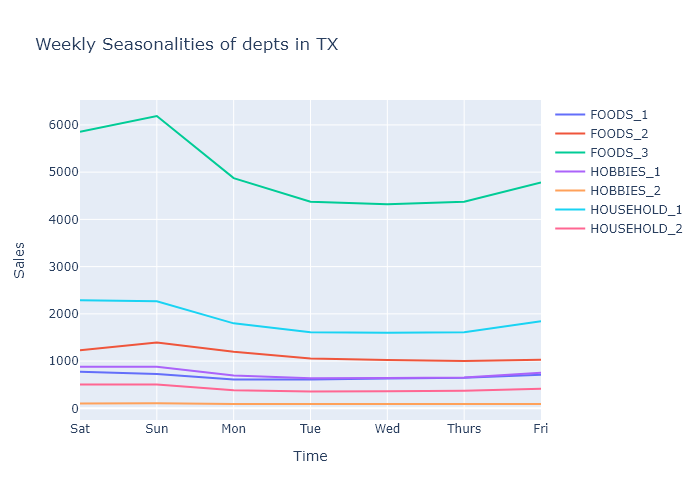

In [21]:
sales_df = sales[sales['state_id'] == 'TX'].groupby(['dept_id']).sum()

w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
w_seas = w_seas.groupby(['days']).mean()
w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Weekly Seasonalities of depts in TX',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

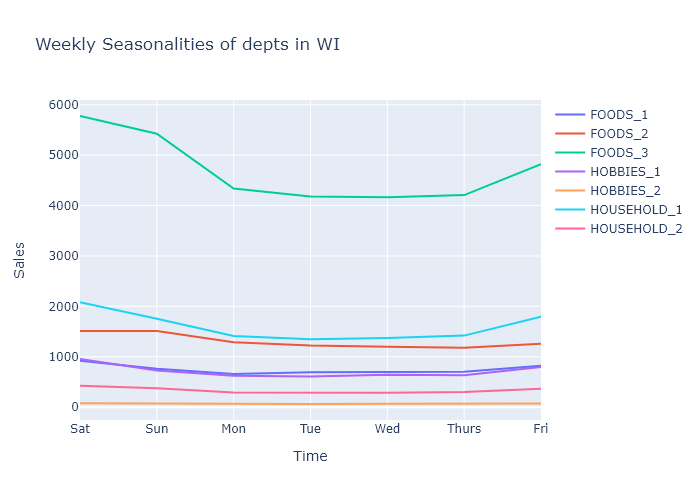

In [22]:
sales_df = sales[sales['state_id'] == 'WI'].groupby(['dept_id']).sum()

w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
w_seas = w_seas.groupby(['days']).mean()
w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Weekly Seasonalities of depts in WI',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Monthly Seasonality by category and state

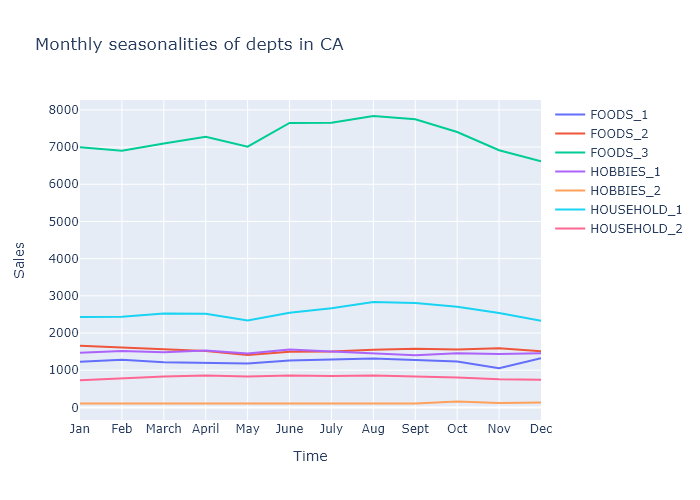

In [23]:
months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
month_no = list(cal['month'].iloc[:1913])

sales_df = sales[sales['state_id'] == 'CA'].groupby(['dept_id']).sum()

m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
m_seas = m_seas.groupby(['months']).mean()

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Monthly seasonalities of depts in CA',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

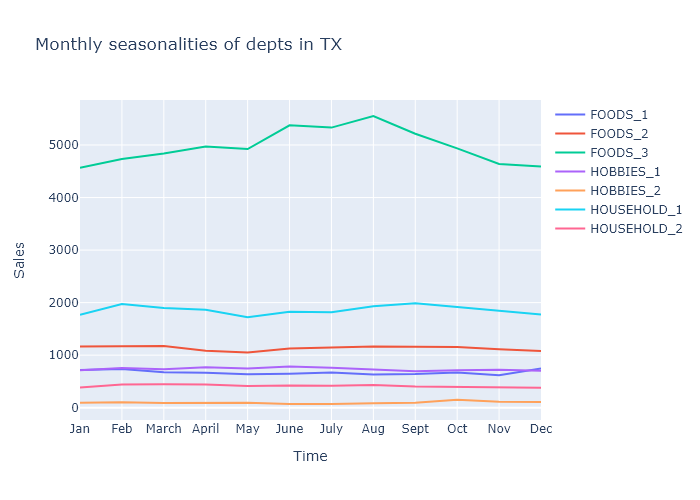

In [24]:
sales_df = sales[sales['state_id'] == 'TX'].groupby(['dept_id']).sum()

m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
m_seas = m_seas.groupby(['months']).mean()

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Monthly seasonalities of depts in TX',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

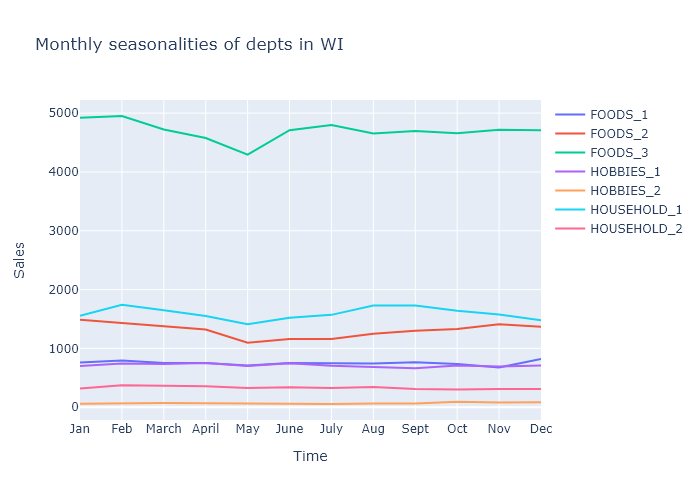

In [25]:
sales_df = sales[sales['state_id'] == 'WI'].groupby(['dept_id']).sum()

m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
m_seas = m_seas.groupby(['months']).mean()

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Monthly seasonalities of depts in WI',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Observations:
* Weekly trends for all states and categories were almost same.
* Sales ate weekends were most for all categories
* In states for all categories the dips were at month May
* In CA and TX the highest sales were observed in August
* In WI the sales weren't much deviating and were increasing in winter

There was not much changes in sales observed according to seasons and categories 

## Feature Engineering (FE)

In [31]:
sales_eval = pd.read_csv('sales_train_evaluation.csv')  
sales_eval = reduce(sales_eval)  #downcasting

#making test dataset, filling it with zero
for day in range(1942,1970):
    sales_eval['d_' + str(day)] = 0
    sales_eval['d_' + str(day)] = sales_eval['d_' + str(day)].astype(np.int16)

sales_eval.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1960  d_1961  d_1962  d_1963  d_1964  \
0       CA    0    0    0    0  ...       0       0       0       0       0   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       0       0       0       0       0   
3       CA    0    0    0    0  ...       0       0       0       0       0   
4       CA    0    0    0    0  ...       0       0       0       0       0   

   d_1965  d_1966  d_1967  d_1968  d_1969  
0       0       0       0       0       0  
1       0       0       0       0       0  
2       0       0       0       0       0  
3       0       0       0       0       0  
4       0       0       0       0       0  

[5 rows x 1975 columns]

In [32]:
# Melting the data from wide form to long form
# i.e. converting all sales at date columns to row, for each row getting sales at that date
#for better understanding compare the above dataframe and below dataframe

data = pd.melt(sales_eval, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
          var_name='d', value_name='sales').dropna()
data.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0

In [33]:
data = pd.merge(data, cal, on='d', how='left')
data = pd.merge(data, prices, on=['store_id','item_id','wm_yr_wk'], how='left')
data.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales       date  wm_yr_wk  ... month  year  event_name_1  \
0       CA  d_1      0 2011-01-29     11101  ...     1  2011           NaN   
1       CA  d_1      0 2011-01-29     11101  ...     1  2011           NaN   
2       CA  d_1      0 2011-01-29     11101  ...     1  2011           NaN   
3       CA  d_1      0 2011-01-29     11101  ...     1  2011           NaN   
4       CA  d_1      0 2011-01-29     11101  ...     1  2011           NaN   

   event_type_1 event_name_2 event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0           NaN          NaN          NaN       0       0        0         NaN  
1           NaN          NaN          NaN       0       0        0         NaN  
2           NaN          NaN          NaN       0       0        0         NaN  
3           NaN          NaN          NaN       0       0        0         NaN  
4           NaN          NaN          NaN       0       0        0         NaN  

[5 rows x 22 columns]

In [40]:
data["sell_price"].fillna(data.groupby("id")["sell_price"].transform("mean"), inplace=True)
data['d'] = data['d'].apply(lambda a: a.split('_')[1]).astype(np.int16)
data.drop(columns=["date","weekday"], inplace=True)
data.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d  sales  wm_yr_wk  wday  month  year event_name_1 event_type_1  \
0       CA  1      0     11101     1      1  2011          NaN          NaN   
1       CA  1      0     11101     1      1  2011          NaN          NaN   
2       CA  1      0     11101     1      1  2011          NaN          NaN   
3       CA  1      0     11101     1      1  2011          NaN          NaN   
4       CA  1      0     11101     1      1  2011          NaN          NaN   

  event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  sell_price  
0          NaN          NaN        0        0        0    8.281250  
1          NaN          NaN        0        0        0    3.970703  
2          NaN          NaN        0        0        0    2.970703  
3          NaN          NaN        0        0        0    4.527344  
4          NaN          NaN        0        0        0    2.941406

In [41]:
#label encoding
#https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling

cols = data.dtypes.index.tolist()
d_types = data.dtypes.values.tolist()

for i,type in enumerate(d_types):
    if type.name == 'category':
        data[cols[i]] = data[cols[i]].cat.codes

In [42]:
#Intoducing lags and rolling features
#lag features

lags = [1,2,3,5,7,14,21,28]
for lag in lags:
    data["lag_" + str(lag)] = data.groupby("id")["sales"].shift(lag).astype(np.float16)

In [43]:
#rolling mean features

data['rolling_mean_10'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(10).mean())
data['rolling_mean_20'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(20).mean())
data['rolling_mean_30'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(30).mean())

In [44]:
data.head()

id  item_id  dept_id  cat_id  store_id  state_id  d  sales  wm_yr_wk  \
0  14370     1437        3       1         0         0  1      0     11101   
1  14380     1438        3       1         0         0  1      0     11101   
2  14390     1439        3       1         0         0  1      0     11101   
3  14400     1440        3       1         0         0  1      0     11101   
4  14410     1441        3       1         0         0  1      0     11101   

   wday  ...  lag_2  lag_3  lag_5  lag_7  lag_14  lag_21  lag_28  \
0     1  ...    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1     1  ...    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2     1  ...    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3     1  ...    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4     1  ...    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

   rolling_mean_10  rolling_mean_20  rolling_mean_30  
0              NaN              NaN              NaN  
1              NaN              NaN              NaN  
2              NaN              NaN              NaN  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN  

[5 rows x 31 columns]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 31 columns):
id                 int16
item_id            int16
dept_id            int8
cat_id             int8
store_id           int8
state_id           int8
d                  int16
sales              int16
wm_yr_wk           int16
wday               int8
month              int8
year               int16
event_name_1       int8
event_type_1       int8
event_name_2       int8
event_type_2       int8
snap_CA            int8
snap_TX            int8
snap_WI            int8
sell_price         float16
lag_1              float16
lag_2              float16
lag_3              float16
lag_5              float16
lag_7              float16
lag_14             float16
lag_21             float16
lag_28             float16
rolling_mean_10    float64
rolling_mean_20    float64
rolling_mean_30    float64
dtypes: float16(9), float64(3), int16(6), int8(13)
memory usage: 4.2 GB


In [46]:
#As data is very large to handle(4.2 GB), considering only the further 900 days data 

data = data[data['d']>1000]
data.head()

id  item_id  dept_id  cat_id  store_id  state_id     d  sales  \
30490000  14370     1437        3       1         0         0  1001      2   
30490001  14380     1438        3       1         0         0  1001      0   
30490002  14390     1439        3       1         0         0  1001      0   
30490003  14400     1440        3       1         0         0  1001      0   
30490004  14410     1441        3       1         0         0  1001      1   

          wm_yr_wk  wday  ...  lag_2  lag_3  lag_5  lag_7  lag_14  lag_21  \
30490000     11339     7  ...    0.0    0.0    0.0    0.0     0.0     0.0   
30490001     11339     7  ...    0.0    0.0    0.0    0.0     0.0     0.0   
30490002     11339     7  ...    0.0    0.0    0.0    0.0     0.0     0.0   
30490003     11339     7  ...    2.0    1.0    2.0    1.0     0.0     3.0   
30490004     11339     7  ...    0.0    0.0    1.0    1.0     0.0     0.0   

          lag_28  rolling_mean_10  rolling_mean_20  rolling_mean_30  
30490000     1.0              0.3             0.40         0.433333  
30490001     2.0              0.0             0.10         0.200000  
30490002     0.0              0.0             0.00         0.000000  
30490003     0.0              1.7             1.70         1.800000  
30490004     1.0              1.0             1.05         1.033333  

[5 rows x 31 columns]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29544810 entries, 30490000 to 60034809
Data columns (total 31 columns):
id                 int16
item_id            int16
dept_id            int8
cat_id             int8
store_id           int8
state_id           int8
d                  int16
sales              int16
wm_yr_wk           int16
wday               int8
month              int8
year               int16
event_name_1       int8
event_type_1       int8
event_name_2       int8
event_type_2       int8
snap_CA            int8
snap_TX            int8
snap_WI            int8
sell_price         float16
lag_1              float16
lag_2              float16
lag_3              float16
lag_5              float16
lag_7              float16
lag_14             float16
lag_21             float16
lag_28             float16
rolling_mean_10    float64
rolling_mean_20    float64
rolling_mean_30    float64
dtypes: float16(9), float64(3), int16(6), int8(13)
memory usage: 2.1 GB


In [49]:
data.to_pickle("data.pkl")

## Conclusion:
* An upward trend in overall sales was observed.
* Among all three states California(CA) has more sales because it has more stores than other states and population is also more compared to others.
* Food category is most sold item as it is more essential than household and hobbies.
* Sales didn't varied much on event days but slightly increased on snap days, because of lower rates.
* Their were 4 types of events out of them Religious events occured most.
* CA_3 store of california has the highest sales among all the stores whereas the lowest sales was observed in CA_4. Maybe the location and population is the reason for it. CA_3 maybe is in some urban area and CA_4 is in little remote area.
* People mostly like to shop on weekends, as most of the people have break on weekends.
* Mostly sales are on peak  in the end of Summer(August)/start of Autumn,a sudden dip in may and stable in winter.
* A final dataset for modeling was prepared by merging all price and date data and introducing some features with previous sales data like lag and rolling mean.


**Thank you!**